In [216]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns 
from collections import Counter
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

df = pd.read_csv("adult.data", header=None, sep=", ")
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "class"]
df = df[df["workclass"] != '?']
df = df[df["education"] != '?']
df = df[df["marital-status"] != '?']
df = df[df["occupation"] != '?']
df = df[df["relationship"] != '?']
df = df[df["race"] != '?']
df = df[df["sex"] != '?']
df = df[df["native-country"] != '?']
below = df[df["class"] == "<=50K"]
above = df[df["class"] == ">50K"]
print("Count(Above 50K) = " + str(len(above.index)))
print("Count(Below 50K) = " + str(len(below.index)))
df.head()


<ipython-input-216-e137e3ed56a3>:10: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



Count(Above 50K) = 7508
Count(Below 50K) = 22654


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


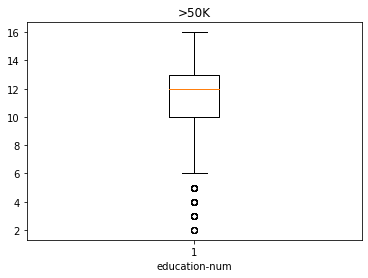

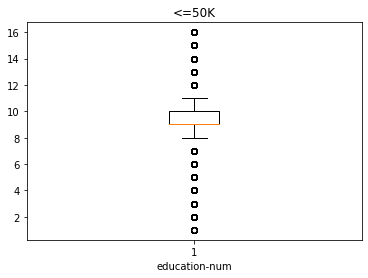

In [217]:
def educationnum_and_class():
    above_50k = list(above["education-num"])
    below_50k = list(below["education-num"])
    plt.boxplot(above_50k)
    plt.title(">50K")
    plt.xlabel("education-num")
    plt.show()
    plt.boxplot(below_50k)
    plt.title("<=50K")
    plt.xlabel("education-num")
    plt.show() 
educationnum_and_class()

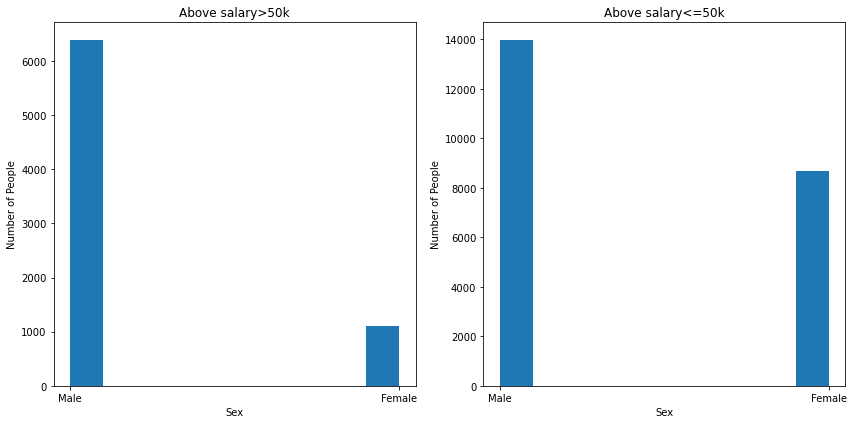

In [218]:
def sex_and_class():
    above_50k = list(above["sex"])
    below_50k = list(below["sex"])
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.hist(above_50k)
    plt.xlabel("Sex")
    plt.ylabel("Number of People")
    plt.title("Above salary>50k")
    plt.subplot(1,2,2)
    plt.xlabel("Sex")
    plt.ylabel("Number of People")
    plt.title("Above salary<=50k")
    plt.hist(below_50k)
    plt.tight_layout()
    plt.show()
sex_and_class()

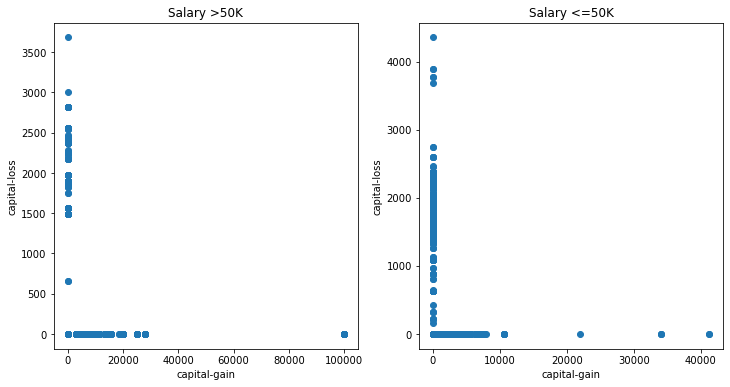

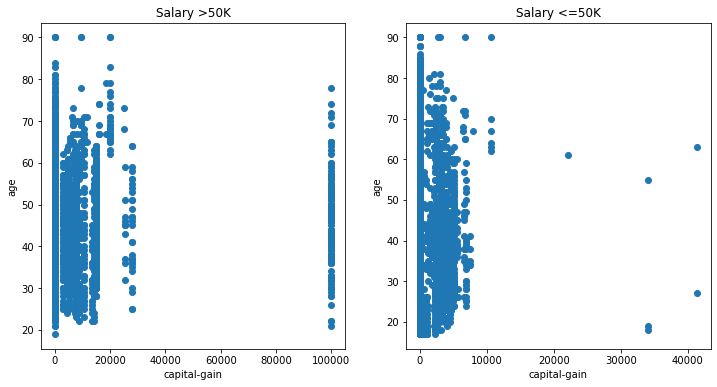

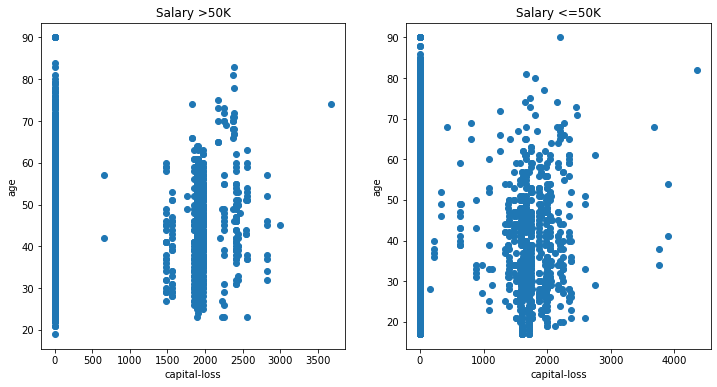

In [219]:
def gain_loss_age():
    above_50k_gain=above["capital-gain"]
    above_50k_loss=above["capital-loss"]
    below_50k_gain=below["capital-gain"]
    below_50k_loss=below["capital-loss"]
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.scatter(above_50k_gain,above_50k_loss)
    plt.xlabel("capital-gain")
    plt.ylabel("capital-loss")
    plt.title("Salary >50K")
    plt.subplot(1,2,2)
    plt.scatter(below_50k_gain,below_50k_loss)
    plt.xlabel("capital-gain")
    plt.ylabel("capital-loss")
    plt.title("Salary <=50K")
    plt.show()
    above_50k_gain=above["capital-gain"]
    above_50k_age=above["age"]
    below_50k_gain=below["capital-gain"]
    below_50k_age=below["age"]
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.scatter(above_50k_gain,above_50k_age)
    plt.xlabel("capital-gain")
    plt.ylabel("age")
    plt.title("Salary >50K")
    plt.subplot(1,2,2)
    plt.scatter(below_50k_gain,below_50k_age)
    plt.xlabel("capital-gain")
    plt.ylabel("age")
    plt.title("Salary <=50K")
    plt.show()
    above_50k_loss=above["capital-loss"]
    above_50k_age=above["age"]
    below_50k_loss=below["capital-loss"]
    below_50k_age=below["age"]
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.scatter(above_50k_loss,above_50k_age)
    plt.xlabel("capital-loss")
    plt.ylabel("age")
    plt.title("Salary >50K")
    plt.subplot(1,2,2)
    plt.scatter(below_50k_loss,below_50k_age)
    plt.xlabel("capital-loss")
    plt.ylabel("age")
    plt.title("Salary <=50K")
    plt.show()
gain_loss_age()

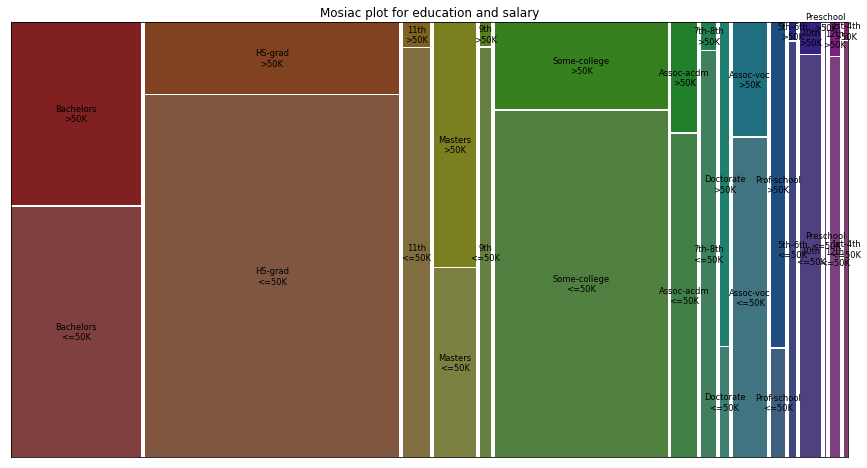

In [220]:
def mosiac_education(x,y,title):
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,8))
    fig.subplots_adjust(hspace=.5)
    mosaic(df, [x,y], ax=axes, axes_label=False)
    plt.title(title)
    plt.show()
mosiac_education("education","class","Mosiac plot for education and salary")

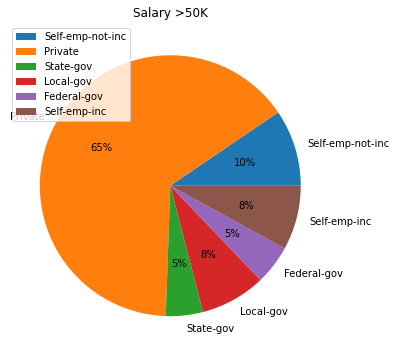

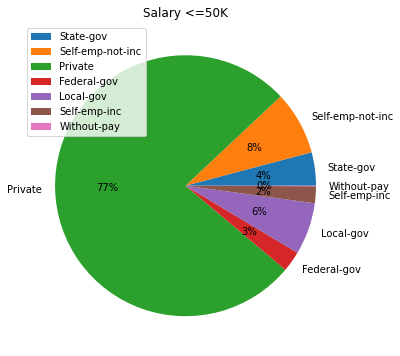

In [221]:
def workclass_salary():
    workclass_above50k = Counter(above["workclass"])
    workclass_below50k = Counter(below["workclass"])
    plt.figure(figsize=(12,6))
    plt.pie(workclass_above50k.values(), labels=workclass_above50k.keys(), autopct='%1.0f%%')
    plt.title("Salary >50K")
    plt.legend()
    plt.show()
    plt.figure(figsize=(12,6))
    plt.pie(workclass_below50k.values(), labels=workclass_below50k.keys(), autopct='%1.0f%%')
    plt.title("Salary <=50K")
    plt.legend()
    plt.show()
workclass_salary()

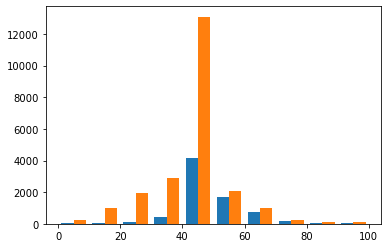

In [240]:
y1 = list(above["hours-per-week"])
y2 = list(below["hours-per-week"])
plt.hist([y1,y2],bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.show()